# Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$

In [2]:
import csv
import numpy as np
from array import *

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}
# print (letter2idx['a'])
T_list = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T_list.append(row)
        
T = np.array(T_list).astype("float")
# print(T[0, 0])
startingChar = "."

In [3]:
def cleanString (string_input):
    string_inputCleaned = []
    for i in range(0, len(string_input)):
        currString = string_input[i]
        currLength = len(string_input[i])
        for j in range(0, currLength):
            if currString[j] == '.':
                currString = currString[:j] + ' ' + currString[j+1:]
            if j == currLength-1:
                string_inputCleaned.append(currString)
    return string_inputCleaned

In [4]:
# This function will generate random text of length N, 
# using a first order Markov Chain and the transition matrix provided in the problem statement
def randomText (N, alphabet, T):
    randChain = '.'
    for i in range(1, N+1): 
        newProb = T[letter2idx[randChain[i-1]], :].copy()
        newProb /= newProb.sum()
        newChar = np.random.choice(alphabet, 1, p = newProb.copy())
        randChain += newChar[0]
    return randChain

In [5]:
from __future__ import print_function
# Example:
# Generate random text of length 50 (50 characters) using 1st order Markov Chain
genText = randomText(50, alphabet, T)
genTextCleaned = cleanString(genText)
for i in range(0, len(genText)):
    print (genTextCleaned[i], end="")

 y hesangr r  tey arevile ar t toliof pprin mam y a

The transition matrix used below is the transpose of the transition matrix of English language provided for this homework. I.e., the rows correspond to the state at time t, whereas the columns are the state at time t-1.

Given a string of missing letters of size N, we're asked to predict the missing letters using Markov chains. We need to find the marginal distributions of the missing letters, conditioned on the observed ones ans sample from these distributions as follows. We are asked to calculate:

$$p(x_{-\alpha}|x_{\alpha})$$
where $\alpha$ denotes indices of observed letters.

For instance, say we are given the string 'a _ _ _ b', where 
$N = 5$, and $x_1 = \text{'a'}$ and $x_5 = \text{'b'}$ are the observed letters. Similarly, $x_2 = \text{'_'}$, $x_3 = \text{'_'}$ and $x_4 = \text{'_'}$ are the missing ones. Therefore we have, $\alpha=\{1,5\}$ and $-\alpha=\{2,3,4\}$ and the following Markov chain can be constructed:



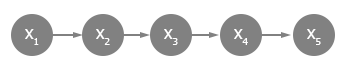

In [1]:
from IPython.display import Image
Image(filename='hw3_fig1.png') 

With the following joint probability distribution:
$$p(x_{2}, x_{3}, x_{4}|x_{1} = \text{'a'}, x_{5} = \text{'b'}) \propto p(x_{5} = \text{'b'}|x_{4}) \cdot p(x_{4}|x_{3}) \cdot p(x_{3}|x_{2}) \cdot p(x_{2}|x_{1} = \text{'a'}) $$
$$p(x_{2}|x_{1} = \text{'a'}, x_{5} = \text{'b'}) \propto \sum_{x_{3}, x_{4}} \text{'a'}, x_{5} = \text{'b'}) \propto p(x_{5} = \text{'b'}|x_{4}) \cdot p(x_{4}|x_{3}) \cdot p(x_{3}|x_{2}) \cdot p(x_{2}|x_{1} = \text{'a'})$$

The marginals can be computed by distributing summation over variable states over the products of factors, which is viewed as "messages" being sent from one node to another. To compute the marginal probability at a node, we have to multiply the incoming messages at that node, and sum them over the other variables at other nodes which are not included in the joint probability distribution.

This can be generalized for when we have N variables, $x_{N+1}$ is observed as $\hat{x_{N+1}}$ and $x_{0}$ is observed as

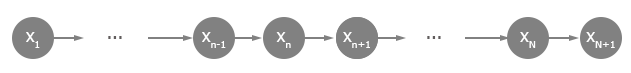

In [3]:
Image(filename='hw3_fig2.png') 

 $\hat{x_{0}}$ we want to compute the marginal probability at the other end of the node, $x_{1}$

$$p(x_{1}| x_{0}=\hat{x_{0}}, x_{N+1}=\hat{x_{N+1}}) \propto \sum_{x_{2, 3, ... N-1}} p(x_{2}|x_{1}) ... p(x_{N}=\hat{x_{N}}|x_{N-1})$$
$$p(x_{1}| x_{0}=\hat{x_{0}}, x_{N+1}=\hat{x_{N+1}}) \propto \sum_{x_{N}} p(x_{N+1}=\hat{x_{N+1}}|x_{N}) ... \sum_{x_{n}} p(x_{n+1}|x_{n}) ... \sum_{x_{2}} p(x_{3}|x_{2}) \cdot p(x_{2}|x_{1}) \cdot p(x_{1}|x_{0}=\hat{x_{0}})$$

The joint distribution above was written using the Markov property, which states that the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that came before it. The summation above can then be factored into products of local functions of neighboring nodes.

When the messages are computed from a node to another node at its right (e.g. from $x_{2}$ to $x_{3}$), we will call them "forward messages". Forward message, from $x_{n-1}$ to $x_{n}$ is the product of the incoming message to node $x_{n-1}$ (which is a function of $x_{n-1}$) and the local potential at node $x_{n-1}$, summed over all possible states of the variable which the message departs, $x_{n-1}$.

$$m_{\alpha} = \sum_{x_{n-1}} p(x_{n}|x_{n-1}) m_{\alpha}(x_{n-1})$$
When neither $x_{n-1}$ nor $x_{n}$ are observed, this summation can also be represented as a matrix multiplication:

$$m_{\alpha} = \textbf{T} \cdot \textbf{m}_{\alpha}(x_{n-1})$$
where, $p(x_{n}|x_{n-1})$ is the transition matrix, $\textbf{T}$, and $m_{\alpha}(x_{n-1})$ is a column vector.

Similarly, when the messages are computed from a node to another node at its left (e.g. from $x_{3}$ to $x_{2}$), we will them "backward messages":
$$m_{\beta} = \sum_{x_{n+1}} p(x_{n+1}|x_{n}) m_{\beta}(x_{n+1})$$
in matrix form:
$$m_{\beta} = \textbf{m}_{\beta}^{T}(x_{n+1}) \cdot \textbf{T}$$

When we have observed nodes, we need to clamp the distributions. For instance, the local function, $p(x_{n}|x_{n-1})$, corresponds to the transition matrix, which is 2 dimensional. However, when one of the variables is observed, it turns into either a column or a row vector (depending on which variable is observed). If both variables are observed, then it is a scalar.

The marginal probability of a node can be found by simply multiplying the incoming messages from its neighbor on the left (forward messages), and on the right (backward messages), and then normalizing the final product.

$$p(x_{1}| x_{N}=\hat{x_{N}}) \propto m_{\alpha} \cdot m_{\beta}$$

For the sake of simplicity, it was assumed that $x_{0}$ = '.' and $x_{N+1}$ = '.' for all strings. Two MATLAB functions, one to compute the messages transmitted between nodes, and another to predict the missing letters in a given string. It sould be noted that meassages are normalized at each step.

Output:

th.mbre.n.fix.

bulst.ons.to.be.answiree

imeate.vagheng.lerreing

quntt.oprz.fedeit.aa.tte.on.

Output:

the.br.an.fex.

oursthand.to.be.answeres

in.ath.wathend.he.r.ing

qur.t.terz.t....t.ae.t.e.ae.